In [3]:
# Only bp on gains and shifts, no hebbian learning on weight matrix, to test the initial bp
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_nohebb import SimpleNeuralNetwork

In [4]:
# load the pickle file
with open('weights_abb05_nohebb.pkl', 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    gain_changes = pickle.load(f)
    shift_changes = pickle.load(f)
    gains = pickle.load(f)
    shifts = pickle.load(f)
epochs = len(losses)

In [5]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

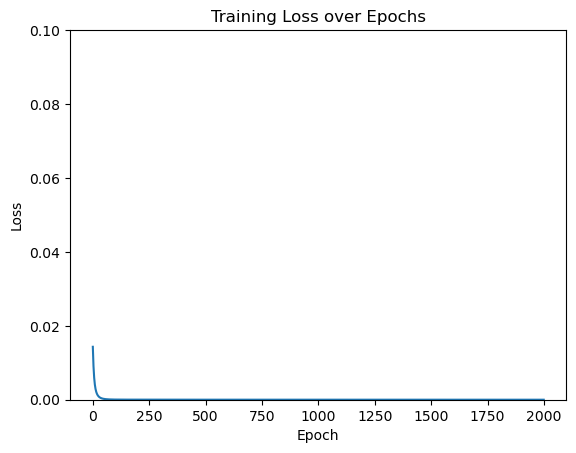

In [6]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.1])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

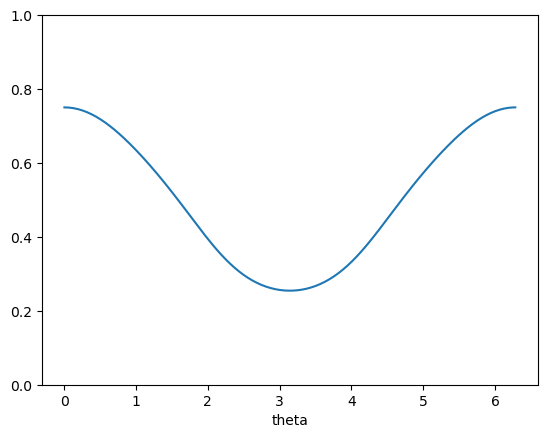

In [7]:
# Plotting the outputs
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

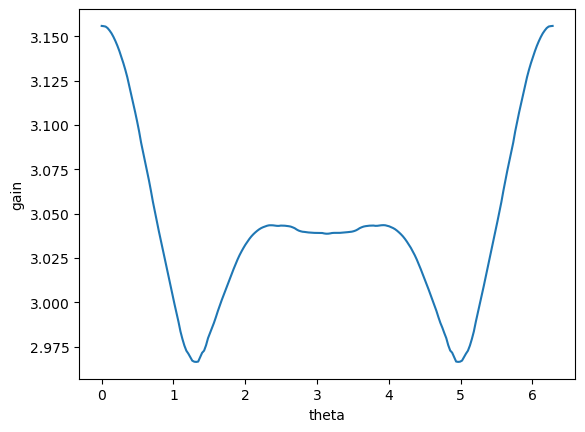

In [8]:
final_gain = gains[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), final_gain.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("gain")
# plt.savefig('abb05_ws.png')
plt.show()

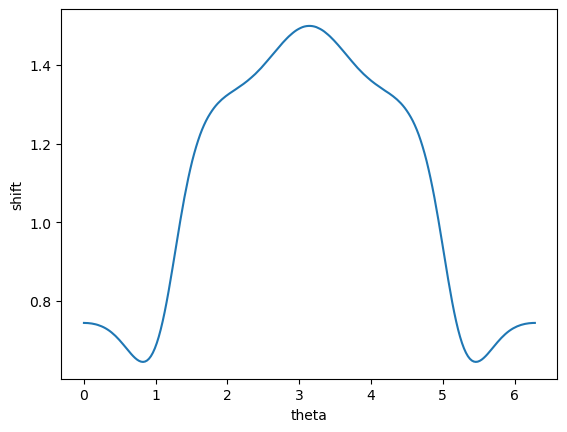

In [9]:
final_shift = shifts[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), final_shift.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("shift")
# plt.savefig('abb05_ws.png')
plt.show()

In [10]:
rates = []
for x in xs:
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain * (input - model.shift))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.6916, 0.6913, 0.6903, ..., 0.6903, 0.6913, 0.6916],
       [0.6914, 0.6917, 0.6913, ..., 0.6889, 0.6905, 0.6914],
       [0.6908, 0.6917, 0.6918, ..., 0.6872, 0.6893, 0.6908],
       ...,
       [0.6908, 0.6893, 0.6872, ..., 0.6918, 0.6917, 0.6908],
       [0.6914, 0.6905, 0.6889, ..., 0.6912, 0.6917, 0.6914],
       [0.6916, 0.6913, 0.6903, ..., 0.6903, 0.6913, 0.6916]],
      dtype=float32)

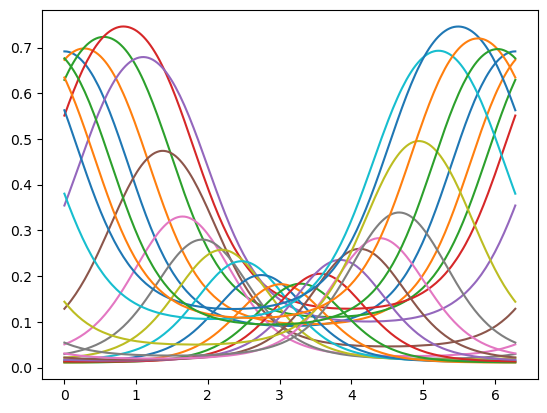

In [11]:
for i in np.arange(0,model.input_size,10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.show()

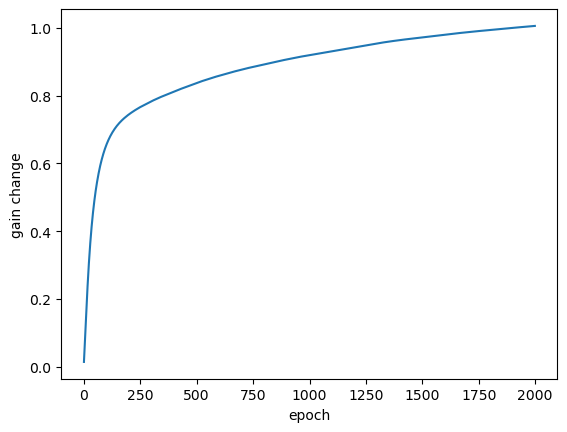

In [12]:
plt.plot(np.arange(epochs), gain_changes)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.savefig('abb05_gc.png')
plt.show()

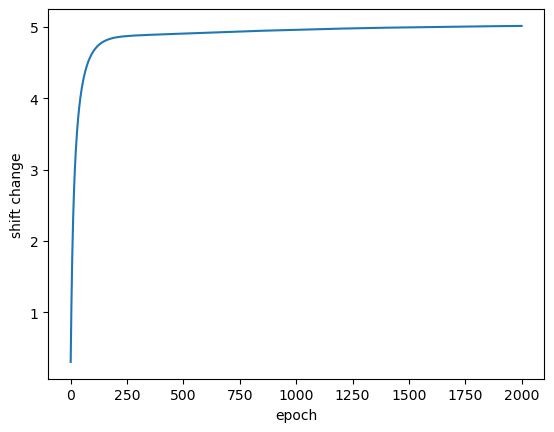

In [13]:
plt.plot(np.arange(epochs), shift_changes)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.savefig('abb05_gc.png')
plt.show()